<a href="https://colab.research.google.com/github/hannesstuehrenberg/Probabilistic-Machine-Learning_lecture-PROJECTS/blob/08-1SHXXXX_football_analytics/projects/08-1SHXXXX_football_analytics/notebooks/05_model_training_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 1.8 MB/s eta 0:00:00


In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch
from mplsoccer import Sbopen
from tqdm import tqdm
import gdown

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Initialize parser
parser = Sbopen()


5. Model Training and Evaluation

* Training process
* Model evaluation (metrics, plots, performance)
* Cross-validation or uncertainty quantification


In [3]:
file_id = '1_WstcnGf_tUzWBj8XTN104EOkFlF5UN_'
url = f'https://drive.google.com/uc?id={file_id}'
shots_master_df = pd.read_csv(url)

print(shots_master_df.shape)

(79966, 67)


In [5]:
shots_master_df = shots_master_df.drop_duplicates()

print(shots_master_df.shape)

(79862, 67)


In [7]:
shots_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79862 entries, 0 to 79965
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           79862 non-null  object 
 1   index                        79862 non-null  int64  
 2   match_id                     79862 non-null  int64  
 3   period                       79862 non-null  int64  
 4   timestamp                    79862 non-null  object 
 5   team_id                      79862 non-null  int64  
 6   team_name                    79862 non-null  object 
 7   player_id                    79862 non-null  float64
 8   player_name                  79862 non-null  object 
 9   position_id                  79862 non-null  float64
 10  position_name                79862 non-null  object 
 11  x                            79862 non-null  float64
 12  y                            79862 non-null  float64
 13  end_x                

In [8]:
feature_columns = [
    'distance_to_goal',
    'angle_to_goal_deg',
    'opponents_in_way',
    'teammates_in_way',
    'with_dominant_foot',
    'shot_first_time',
    'shot_one_on_one',
    'shot_open_goal',
    'technique_Backheel',
    'technique_Diving Header',
    'technique_Half Volley',
    'technique_Lob',
    'technique_Normal',
    'technique_Overhead Kick',
    'technique_Volley',
    'subtype_Free Kick',
    'subtype_Open Play',
    'subtype_Penalty',
    'is_header'
]

from sklearn.model_selection import train_test_split

X = shots_master_df[feature_columns]
y = shots_master_df['goal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

print("\nGoal distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nGoal distribution in test set:")
print(y_test.value_counts(normalize=True))




Training set size: 63889 samples
Test set size: 15973 samples

Goal distribution in training set:
goal
0    0.888087
1    0.111913
Name: proportion, dtype: float64

Goal distribution in test set:
goal
0    0.888124
1    0.111876
Name: proportion, dtype: float64


In [15]:
numerical_features = [
    'distance_to_goal',
    'angle_to_goal_deg',
    'opponents_in_way',
    'teammates_in_way',
    'with_dominant_foot'
]

binary_features = [
    'shot_first_time',
    'shot_one_on_one',
    'shot_open_goal',
    'technique_Backheel',
    'technique_Diving Header',
    'technique_Half Volley',
    'technique_Lob',
    'technique_Normal',
    'technique_Overhead Kick',
    'technique_Volley',
    'subtype_Free Kick',
    'subtype_Open Play',
    'subtype_Penalty',
    'is_header'
]

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('bin', 'passthrough', binary_features)
    ]
)


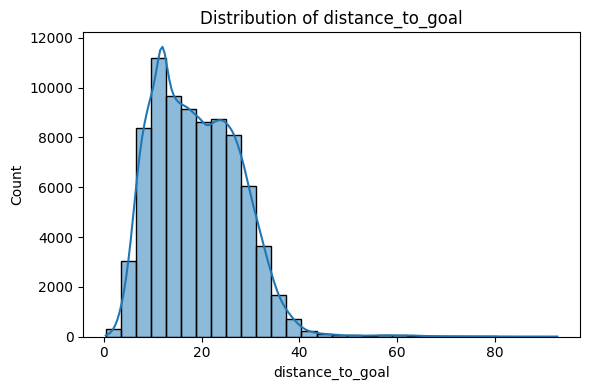

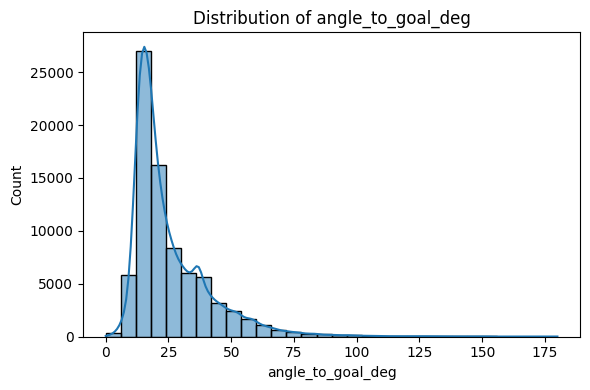

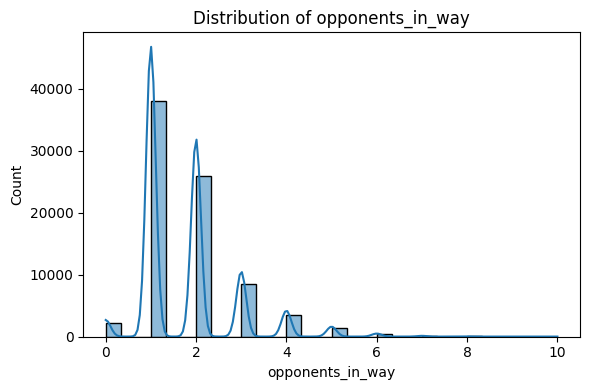

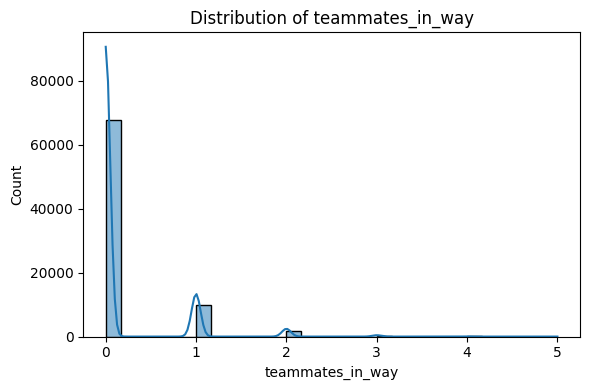

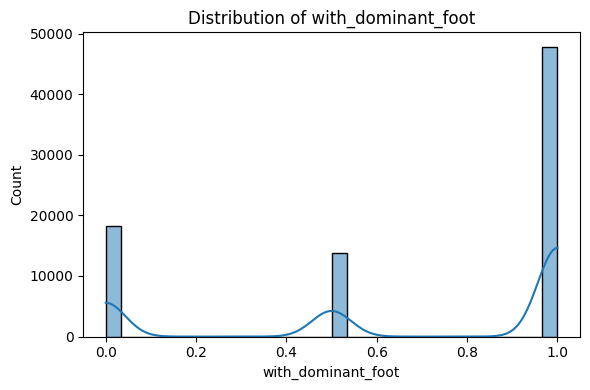

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(shots_master_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


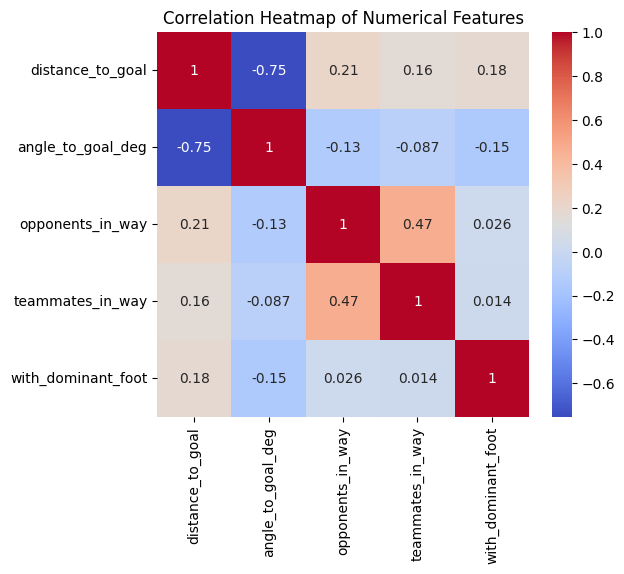

In [17]:
corr = shots_master_df[numerical_features].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_num = shots_master_df[numerical_features]

X_num_const = sm.add_constant(X_num)

In [19]:
import statsmodels.api as sm

vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

print(vif_data)

              Feature       VIF
0    distance_to_goal  4.581543
1   angle_to_goal_deg  2.315673
2    opponents_in_way  4.805525
3    teammates_in_way  1.457450
4  with_dominant_foot  3.648898


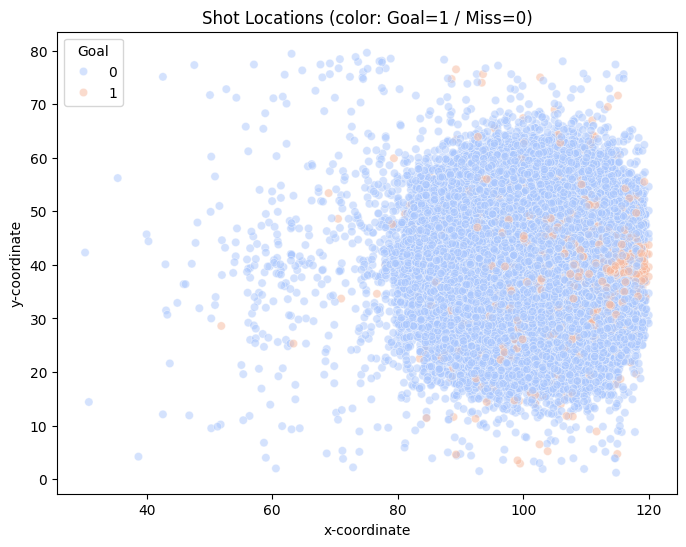

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=shots_master_df,
    x='x', y='y',
    hue='goal',
    palette='coolwarm',
    alpha=0.5
)
plt.title("Shot Locations (color: Goal=1 / Miss=0)")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.legend(title='Goal')
plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        class_weight='balanced',
        random_state=42
    ))
])

In [12]:
pipeline_logistic.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['distance_to_goal',
                                                   'angle_to_goal_deg',
                                                   'opponents_in_way',
                                                   'teammates_in_way',
                                                   'with_dominant_foot']),
                                                 ('bin', 'passthrough',
                                                  ['shot_first_time',
                                                   'shot_one_on_one',
                                                   'shot_open_goal',
                                                   'technique_Backheel',
                                                   'technique_Diving Header',
                                                   'technique_Half Volley',
                                                   'technique_Lob',
                                                   'technique_Normal',
                                                   'technique_Overhead Kick',
                                                   'technique_Volley',
                                                   'subtype_Free Kick',
                                                   'subtype_Open Play',
                                                   'subtype_Penalty',
                                                   'is_header'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [22]:
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss

y_pred_proba = pipeline_logistic.predict_proba(X_test)[:, 1]

#Predict class labels with default threshold 0.5
y_pred = pipeline_logistic.predict(X_test)

In [24]:
y_pred = pipeline_logistic.predict(X_test)
y_pred_proba = pipeline_logistic.predict_proba(X_test)[:, 1]

#Metrics:
auc = roc_auc_score(y_test, y_pred_proba)
acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_pred_proba)

print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")
print(f"Log-Loss: {ll:.3f}")

AUC: 0.807
Accuracy: 0.761
Log-Loss: 0.523


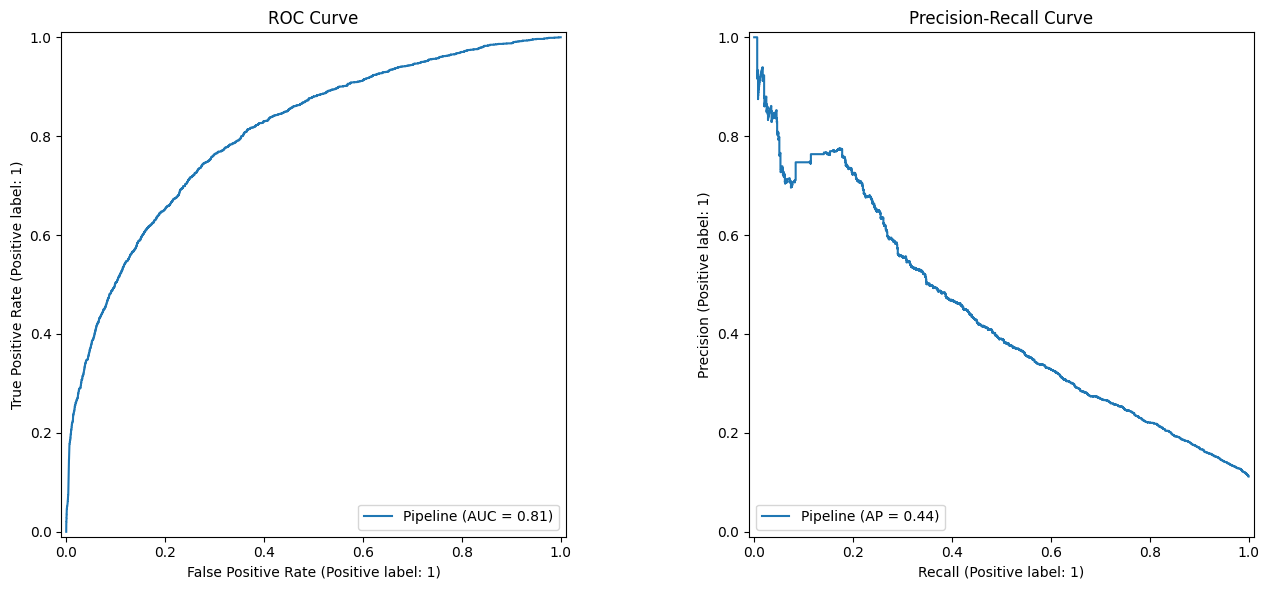

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

roc_display = RocCurveDisplay.from_estimator(pipeline_logistic, X_test, y_test, ax=axes[0])
axes[0].set_title("ROC Curve")

pr_display = PrecisionRecallDisplay.from_estimator(pipeline_logistic, X_test, y_test, ax=axes[1])
axes[1].set_title("Precision-Recall Curve")

plt.tight_layout()
plt.show()

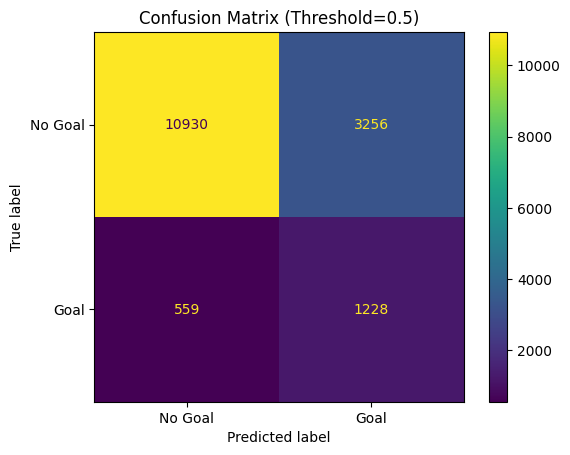

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No Goal", "Goal"]).plot(values_format='d')
plt.title("Confusion Matrix (Threshold=0.5)")
plt.show()


In [29]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.01, 0.05)
precisions, recalls, f1s = [], [], []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_thresh, zero_division=0))

optimal_idx = np.argmax(f1s)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.2f}")
print(f"Precision at optimal threshold: {precisions[optimal_idx]:.3f}")
print(f"Recall at optimal threshold: {recalls[optimal_idx]:.3f}")
print(f"F1 at optimal threshold: {f1s[optimal_idx]:.3f}")


Optimal threshold: 0.70
Precision at optimal threshold: 0.447
Recall at optimal threshold: 0.432
F1 at optimal threshold: 0.439


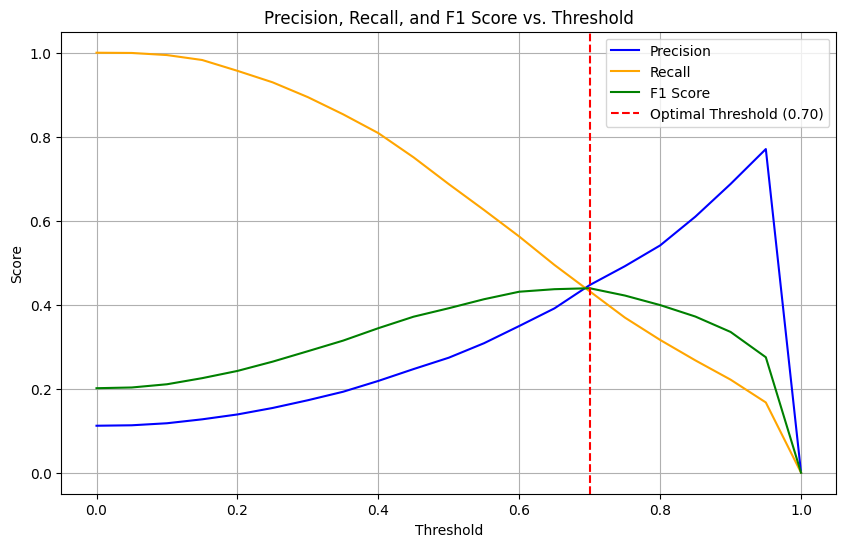

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.plot(thresholds, f1s, label='F1 Score', color='green')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


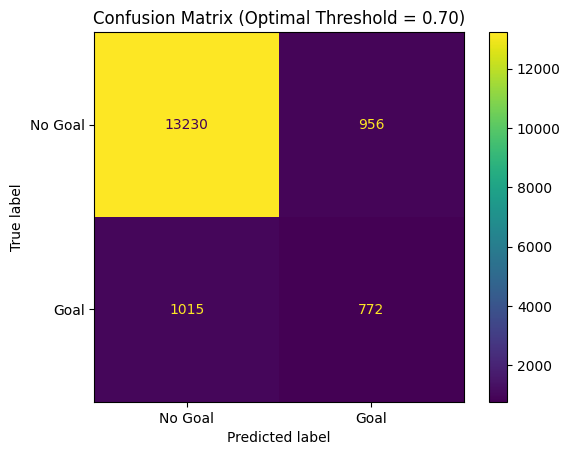

In [32]:
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Goal", "Goal"])
disp.plot(values_format='d')
plt.title(f"Confusion Matrix (Optimal Threshold = {optimal_threshold:.2f})")
plt.show()


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

final_precision = precision_score(y_test, y_pred_optimal, zero_division=0)
final_recall = recall_score(y_test, y_pred_optimal, zero_division=0)
final_f1 = f1_score(y_test, y_pred_optimal, zero_division=0)

print(f"Final Precision: {final_precision:.3f}")
print(f"Final Recall: {final_recall:.3f}")
print(f"Final F1 Score: {final_f1:.3f}")

Final Precision: 0.447
Final Recall: 0.432
Final F1 Score: 0.439


In [34]:
# Recreate final feature list after preprocessing
num_features_scaled = numerical_features  # scaler doesn't change names
bin_features = binary_features            # passthrough leaves names unchanged

all_features = num_features_scaled + bin_features


In [36]:
import pandas as pd

# Extract coefficients from trained logistic regression
coefficients = pipeline_logistic.named_steps['classifier'].coef_[0]

# Create DataFrame for easier viewing
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


                    Feature  Coefficient
11            technique_Lob     1.705519
9   technique_Diving Header     1.065646
17          subtype_Penalty     0.953943
7            shot_open_goal     0.773606
1         angle_to_goal_deg     0.526426
15        subtype_Free Kick     0.510365
6           shot_one_on_one     0.473324
12         technique_Normal     0.316125
5           shot_first_time     0.119083
4        with_dominant_foot     0.030745
3          teammates_in_way    -0.001415
10    technique_Half Volley    -0.192558
14         technique_Volley    -0.327990
2          opponents_in_way    -0.359868
13  technique_Overhead Kick    -0.807609
0          distance_to_goal    -0.820717
16        subtype_Open Play    -1.054239
8        technique_Backheel    -1.349063
18                is_header    -1.593817


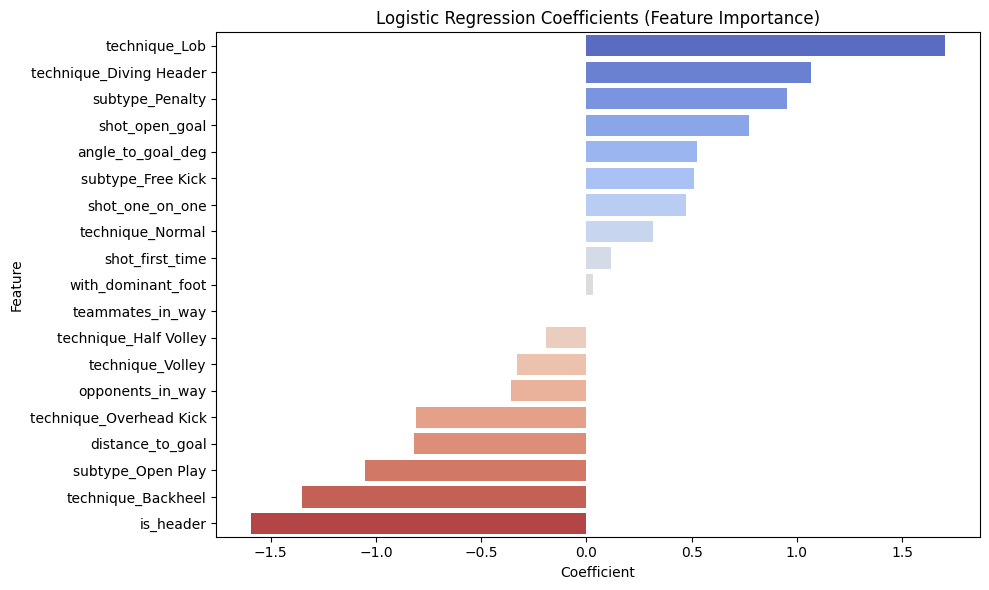

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.tight_layout()
plt.show()


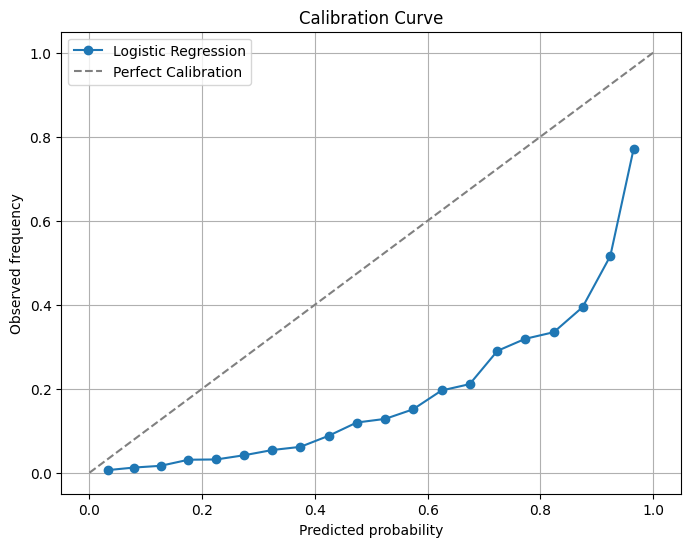

In [39]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=20, strategy='uniform')

plt.figure(figsize=(8,6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted probability')
plt.ylabel('Observed frequency')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_pipeline_logistic = CalibratedClassifierCV(
    estimator=pipeline_logistic,  # your trained pipeline
    method='sigmoid',             # or 'isotonic'
    cv=5                          # internal cross-validation folds for calibration
)

calibrated_pipeline_logistic.fit(X_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('num',
                                                                                   StandardScaler(),
                                                                                   ['distance_to_goal',
                                                                                    'angle_to_goal_deg',
                                                                                    'opponents_in_way',
                                                                                    'teammates_in_way',
                                                                                    'with_dominant_foot']),
                                                                                  ('bin',
                                                                                   'passthrough',
                                                                                   ['shot_first_time',
                                                                                    'shot_one_on_one',
                                                                                    'shot_open_goal',
                                                                                    'technique_Backheel',
                                                                                    'technique_Diving '
                                                                                    'Header',
                                                                                    'technique_Half '
                                                                                    'Volley',
                                                                                    'technique_Lob',
                                                                                    'technique_Normal',
                                                                                    'technique_Overhead '
                                                                                    'Kick',
                                                                                    'technique_Volley',
                                                                                    'subtype_Free '
                                                                                    'Kick',
                                                                                    'subtype_Open '
                                                                                    'Play',
                                                                                    'subtype_Penalty',
                                                                                    'is_header'])])),
                                                 ('classifier',
                                                  LogisticRegression(class_weight='balanced',
                                                                     max_iter=1000,
                                                                     random_state=42))]))

In [43]:
# Predict probabilities with calibrated model
y_pred_proba_calibrated = calibrated_pipeline_logistic.predict_proba(X_test)[:, 1]

# Recompute AUC, log-loss for calibrated probabilities
from sklearn.metrics import roc_auc_score, log_loss

auc_cal = roc_auc_score(y_test, y_pred_proba_calibrated)
ll_cal = log_loss(y_test, y_pred_proba_calibrated)

print(f"Calibrated AUC: {auc_cal:.3f}")
print(f"Calibrated Log-Loss: {ll_cal:.3f}")


Calibrated AUC: 0.807
Calibrated Log-Loss: 0.278


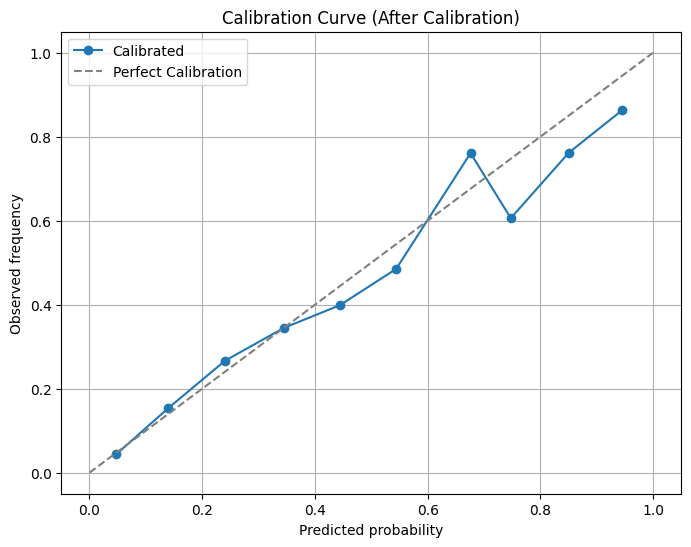

In [44]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_pred_proba_calibrated, n_bins=10)

plt.figure(figsize=(8,6))
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted probability')
plt.ylabel('Observed frequency')
plt.title('Calibration Curve (After Calibration)')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# AUC scores (your existing setup, keep this!)
auc_scores = cross_val_score(
    calibrated_pipeline_logistic, X_train, y_train,
    cv=cv, scoring='roc_auc', n_jobs=-1
)

# Log-loss scores: use built-in scoring string 'neg_log_loss'
logloss_scores = cross_val_score(
    calibrated_pipeline_logistic, X_train, y_train,
    cv=cv, scoring='neg_log_loss', n_jobs=-1
)

# Convert negative log-loss to positive for interpretability
logloss_scores = -logloss_scores

print(f"Cross-validated AUC: mean={auc_scores.mean():.3f}, std={auc_scores.std():.3f}")
print(f"Cross-validated Log-Loss: mean={logloss_scores.mean():.3f}, std={logloss_scores.std():.3f}")

cv_results = pd.DataFrame({
    'AUC': auc_scores,
    'Log-Loss': logloss_scores
})

print(cv_results)

Cross-validated AUC: mean=0.809, std=0.003
Cross-validated Log-Loss: mean=0.278, std=0.002
        AUC  Log-Loss
0  0.810310  0.278375
1  0.809269  0.279013
2  0.809510  0.275792
3  0.813868  0.275637
4  0.804186  0.278977


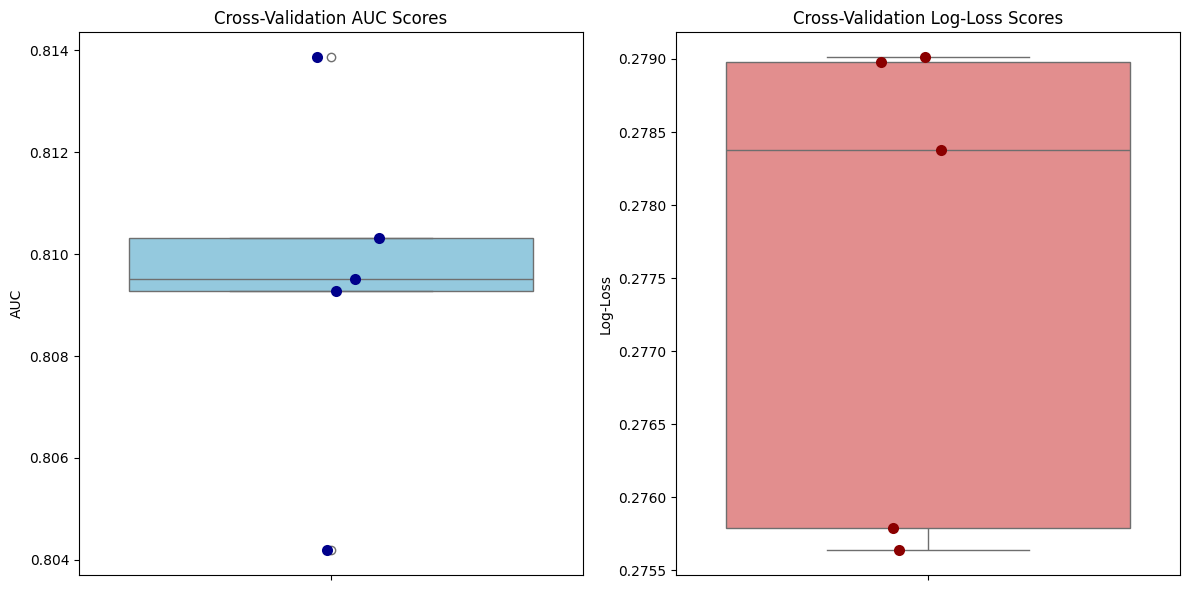

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=cv_results['AUC'], color='skyblue')
sns.stripplot(y=cv_results['AUC'], color='darkblue', jitter=0.1, size=8)
plt.title('Cross-Validation AUC Scores')
plt.ylabel('AUC')

plt.subplot(1, 2, 2)
sns.boxplot(y=cv_results['Log-Loss'], color='lightcoral')
sns.stripplot(y=cv_results['Log-Loss'], color='darkred', jitter=0.1, size=8)
plt.title('Cross-Validation Log-Loss Scores')
plt.ylabel('Log-Loss')

plt.tight_layout()
plt.show()


ValueError: List of boxplot statistics and `positions` values must have same the length

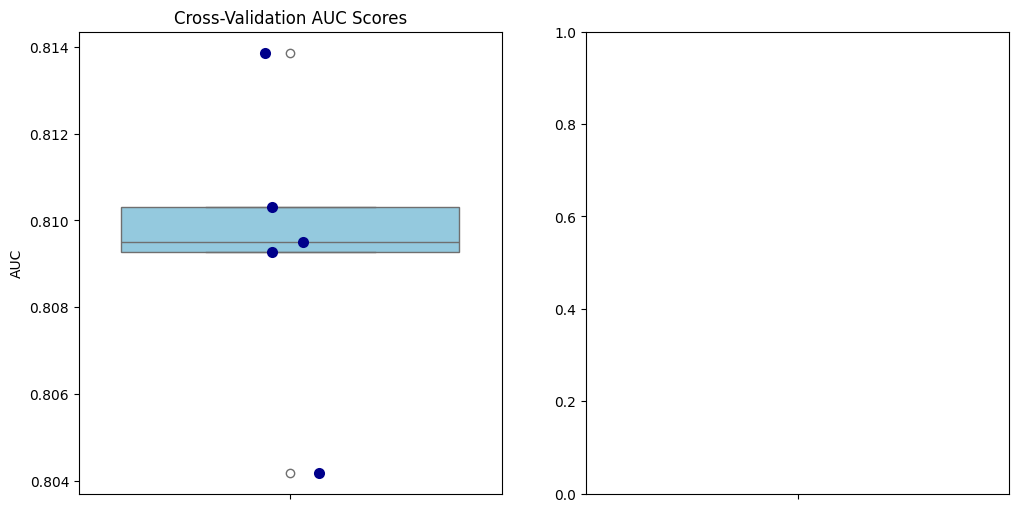

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert scores to DataFrame for easier plotting
cv_results = pd.DataFrame({
    'AUC': auc_scores,
    'Log-Loss': -logloss_scores  # negate because cross_val_score returns negative log-loss
})

plt.figure(figsize=(12, 6))

# AUC boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=cv_results['AUC'], color='skyblue')
sns.stripplot(y=cv_results['AUC'], color='darkblue', jitter=0.1, size=8)
plt.title('Cross-Validation AUC Scores')
plt.ylabel('AUC')

# Log-loss boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=cv_results['Log-Loss'], color='lightcoral')
sns.stripplot(y=cv_results['Log-Loss'], color='darkred', jitter=0.1, size=8)
plt.title('Cross-Validation Log-Loss Scores')
plt.ylabel('Log-Loss')

plt.tight_layout()
plt.show()


Backup

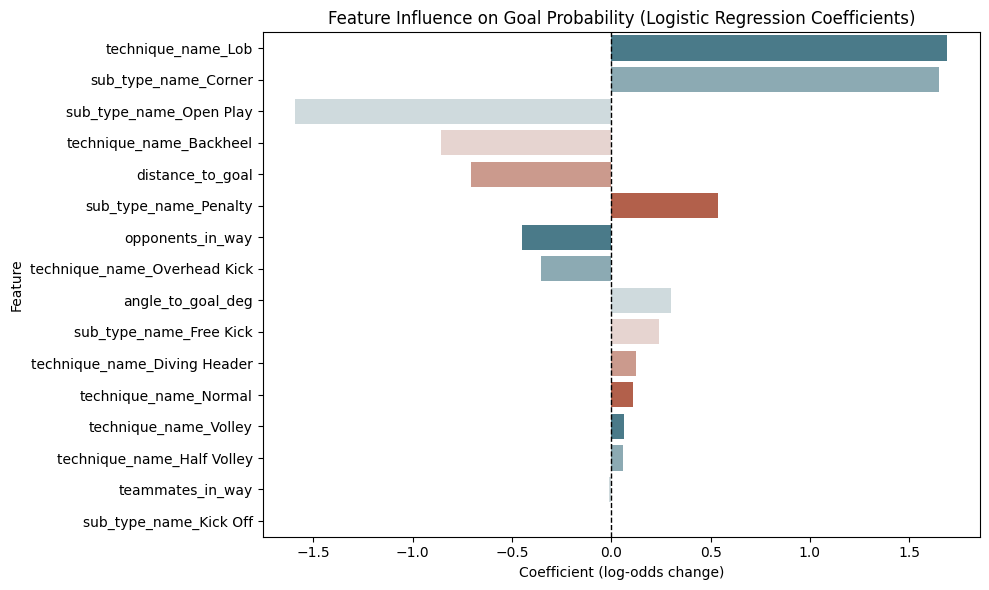

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df,
    palette=sns.diverging_palette(220, 20, as_cmap=False)
)
plt.title("Feature Influence on Goal Probability (Logistic Regression Coefficients)")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Coefficient (log-odds change)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [32]:
from IPython.display import display

display(coef_df.style
    .background_gradient(subset='Coefficient', cmap='coolwarm')
    .format({'Coefficient': '{:+.3f}'})
    .set_caption("Summary of Feature Influence on Goal Probability"))


,Feature,Coefficient
7,technique_name_Lob,+1.692
11,sub_type_name_Corner,+1.649
14,sub_type_name_Open Play,-1.592
4,technique_name_Backheel,-0.859
0,distance_to_goal,-0.708
15,sub_type_name_Penalty,+0.536
2,opponents_in_way,-0.451
9,technique_name_Overhead Kick,-0.357
1,angle_to_goal_deg,+0.301
12,sub_type_name_Free Kick,+0.241


In [34]:
import numpy as np

# Generate grid points (x: 0-120, y: 0-80, or depending on your pitch dimensions)
x_vals = np.linspace(0, 120, 100)  # pitch length
y_vals = np.linspace(0, 80, 80)    # pitch width

xx, yy = np.meshgrid(x_vals, y_vals)
grid_points = np.column_stack([xx.ravel(), yy.ravel()])


In [35]:
import pandas as pd

# Convert to DataFrame
grid_df = pd.DataFrame(grid_points, columns=['x', 'y'])

# Calculate distance and angle to goal center (x=120, y=40 for right goal)
goal_x, goal_y = 120, 40
grid_df['distance_to_goal'] = np.sqrt((goal_x - grid_df['x'])**2 + (goal_y - grid_df['y'])**2)
grid_df['angle_to_goal_deg'] = np.degrees(np.arctan2(
    7.32 / 2,  # half goal width
    grid_df['distance_to_goal']
))

# Add other required features as needed, e.g., zero opponents/teammates, zeros for one-hot dummies
for col in categorical_features:
    grid_df[col] = 0
grid_df['opponents_in_way'] = 0
grid_df['teammates_in_way'] = 0

# Use only columns your model was trained on
X_grid = grid_df[numerical_features + categorical_features]


In [36]:
# Predict probability of goal
goal_probs = pipeline_balanced.predict_proba(X_grid)[:, 1]


In [37]:
stats = pitch.bin_statistic(
    grid_df['x'],
    grid_df['y'],
    values=goal_probs,
    statistic='mean',
    bins=(100, 80)  # match your grid resolution
)

fig, ax = pitch.draw(figsize=(8, 6))
pcm = pitch.heatmap(stats, ax=ax, cmap='Reds', alpha=0.7)
cbar = fig.colorbar(pcm, ax=ax)
cbar.ax.set_ylabel('Probability of goal')

plt.title("Probability of goal across pitch")
plt.tight_layout()
plt.show()



NameError: name 'pitch' is not defined

In [38]:
pip install pymc arviz


In [39]:
import pymc as pm
import numpy as np

X_bayes_df = X_train.copy()
for col in X_bayes_df.columns:
    if X_bayes_df[col].dtype == bool:
        X_bayes_df[col] = X_bayes_df[col].astype(int)


# Make sure X_train and y_train are numpy arrays
X_bayes = X_bayes_df.values.astype(np.float32)  # force numeric type for PyMC compatibility
y_bayes = y_train.values.astype(np.int32)       # target should also be numeric

with pm.Model() as blr:
    # Prior: Gaussian prior over weights (shape: n_features)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_bayes.shape[1])

    # Prior: Intercept
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Linear combination (log-odds)
    logits = intercept + pm.math.dot(X_bayes, beta)

    # Likelihood: Bernoulli with logistic link
    pm.Bernoulli("obs", logit_p=logits, observed=y_bayes)

    # Sample from the posterior
    trace = pm.sample(draws=500, tune=500, target_accept=0.9, cores=1, return_inferencedata=True)


Output()

ERROR:pymc.stats.convergence:There were 500 divergences after tuning. Increase `target_accept` or reparameterize.


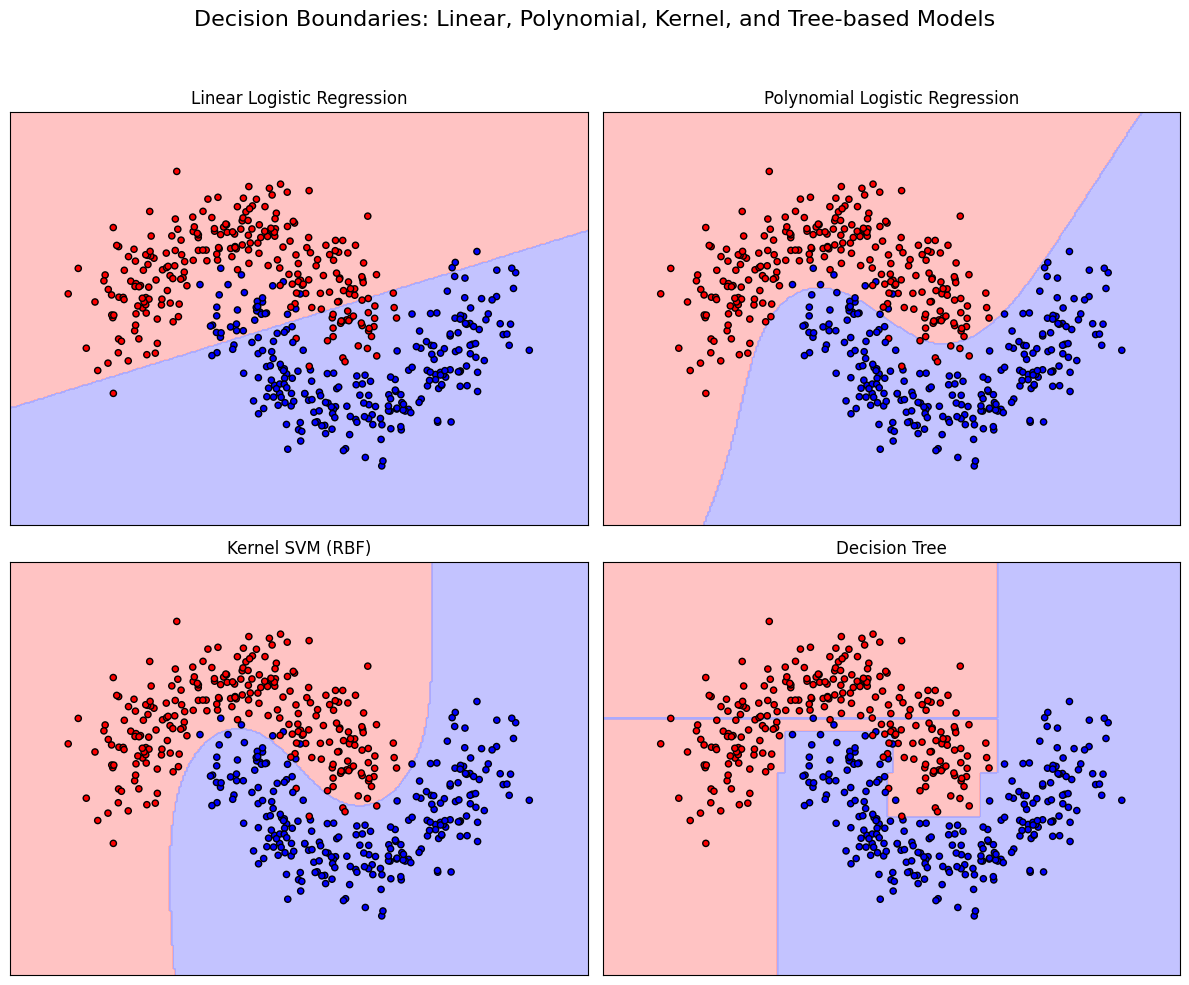

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Generate synthetic 2D data
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Models to compare
models = [
    ("Linear Logistic Regression", LogisticRegression()),
    ("Polynomial Logistic Regression", make_pipeline(PolynomialFeatures(3), LogisticRegression())),
    ("Kernel SVM (RBF)", SVC(kernel="rbf", probability=True)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5))
]

# Colors
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for ax, (title, model) in zip(axs, models):
    model.fit(X, y)
    Z = model.predict(grid).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

plt.suptitle("Decision Boundaries: Linear, Polynomial, Kernel, and Tree-based Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [41]:
pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, ClassifierMixin

# === 1) Define features and target ===
numerical_features = [
    'distance_to_goal', 'angle_to_goal_deg', 'opponents_in_way', 'teammates_in_way'
]

categorical_features = [
    'technique_name_Backheel', 'technique_name_Diving Header', 'technique_name_Half Volley',
    'technique_name_Lob', 'technique_name_Normal', 'technique_name_Overhead Kick',
    'technique_name_Volley', 'sub_type_name_Corner', 'sub_type_name_Free Kick',
    'sub_type_name_Kick Off', 'sub_type_name_Open Play', 'sub_type_name_Penalty'
]

X = shots_master_df[numerical_features + categorical_features]
y = shots_master_df['goal']

# === 2) Train/test split (stratify to keep class balance) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# === 3) Preprocessing pipeline ===
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', 'passthrough', categorical_features)
])

# === 4) PyTorch Neural Network Model Wrapper ===
class TorchNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim=None, hidden_dims=[32,16], lr=0.001, batch_size=256, epochs=20, device=None):
        self.input_dim = input_dim
        self.hidden_dims = hidden_dims
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = device if device else ('cuda' if torch.cuda.is_available() else 'cpu')
        self._build_model()

    def _build_model(self):
        layers = []
        prev_dim = self.input_dim
        for hdim in self.hidden_dims:
            layers.append(nn.Linear(prev_dim, hdim))
            layers.append(nn.ReLU())
            prev_dim = hdim
        layers.append(nn.Linear(prev_dim, 1))
        layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers).to(self.device)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y.reshape(-1,1), dtype=torch.float32).to(self.device)

        dataset = TensorDataset(X_tensor, y_tensor)
        loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        criterion = nn.BCELoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        self.model.train()
        for epoch in range(self.epochs):
            epoch_loss = 0
            for xb, yb in loader:
                optimizer.zero_grad()
                outputs = self.model(xb)
                loss = criterion(outputs, yb)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item() * xb.size(0)
            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {epoch_loss/len(X):.4f}")
        return self

    def predict_proba(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            probs = self.model(X_tensor).cpu().numpy()
        return np.hstack([1 - probs, probs])  # return probs for class 0 and 1

    def predict(self, X):
        probs = self.predict_proba(X)[:,1]
        return (probs >= 0.5).astype(int)

# === 5) Full pipeline combining preprocessing and NN classifier ===
class NeuralNetPipeline:
    def __init__(self):
        self.preprocessor = preprocessor
        self.model = None

    def fit(self, X, y):
        # Fit preprocessor and transform
        X_processed = self.preprocessor.fit_transform(X)

        # Instantiate model with input dimension
        input_dim = X_processed.shape[1]
        self.model = TorchNNClassifier(input_dim=input_dim)

        # Fit model
        self.model.fit(X_processed, y.values)
        return self

    def predict_proba(self, X):
        X_processed = self.preprocessor.transform(X)
        return self.model.predict_proba(X_processed)

    def predict(self, X):
        X_processed = self.preprocessor.transform(X)
        return self.model.predict(X_processed)

# === 6) Train and evaluate ===
nn_pipeline = NeuralNetPipeline()
nn_pipeline.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = nn_pipeline.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.3f}")

# Default threshold 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {acc:.3f}, Log-loss: {ll:.3f}")


Epoch 1/20, Loss: 0.3694
Epoch 2/20, Loss: 0.2816
Epoch 3/20, Loss: 0.2799
Epoch 4/20, Loss: 0.2792
Epoch 5/20, Loss: 0.2789
Epoch 6/20, Loss: 0.2786
Epoch 7/20, Loss: 0.2785
Epoch 8/20, Loss: 0.2782
Epoch 9/20, Loss: 0.2781
Epoch 10/20, Loss: 0.2779
Epoch 11/20, Loss: 0.2781
Epoch 12/20, Loss: 0.2779
Epoch 13/20, Loss: 0.2778
Epoch 14/20, Loss: 0.2777
Epoch 15/20, Loss: 0.2776
Epoch 16/20, Loss: 0.2774
Epoch 17/20, Loss: 0.2774
Epoch 18/20, Loss: 0.2775
Epoch 19/20, Loss: 0.2776
Epoch 20/20, Loss: 0.2775
AUC: 0.803
Accuracy: 0.904, Log-loss: 0.274


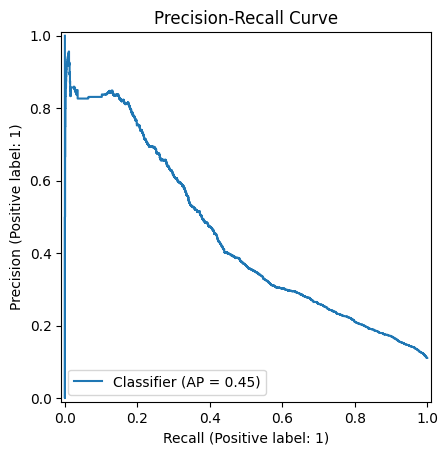

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

# Plot precision-recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision-Recall Curve")
plt.show()


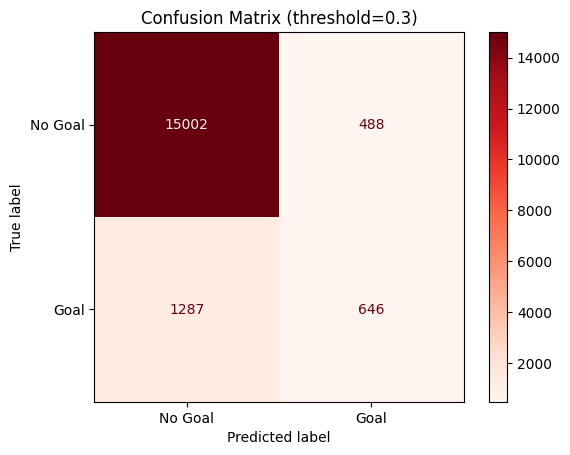

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Binarize predictions at 0.5 threshold
threshold = 0.3
y_pred = (y_pred_proba >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Goal", "Goal"])
disp.plot(cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()


In [45]:
from sklearn.metrics import precision_recall_curve, f1_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 scores for all thresholds (thresholds array is shorter by 1 than precisions and recalls)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])


In [46]:
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.3f}")
print(f"Best F1 score: {best_f1:.3f}")


Best threshold: 0.962
Best F1 score: nan


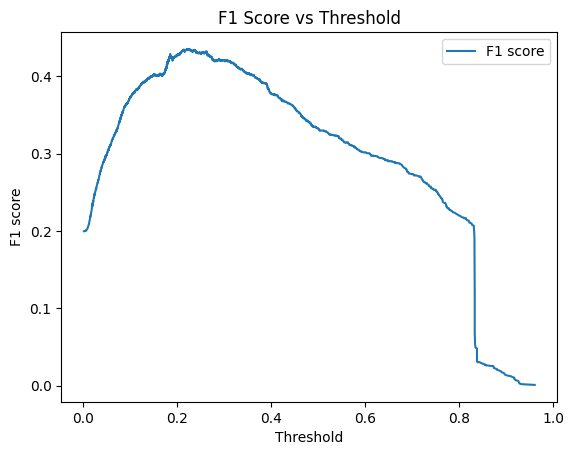

In [47]:
import matplotlib.pyplot as plt

plt.plot(thresholds, f1_scores, label='F1 score')
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.title("F1 Score vs Threshold")
plt.legend()
plt.show()


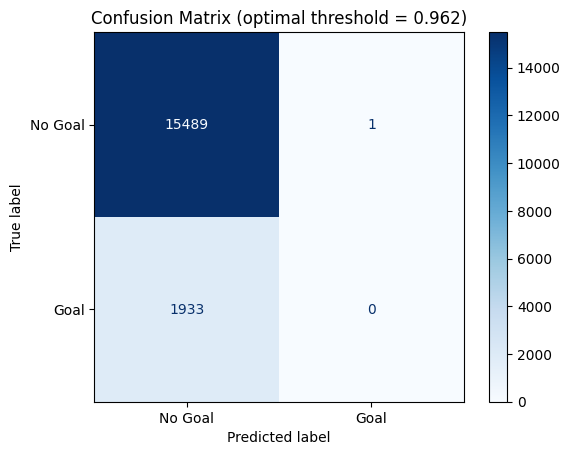

Precision: 0.000
Recall: 0.000
F1 Score: nan


In [48]:
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Goal", "Goal"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (optimal threshold = {best_threshold:.3f})")
plt.show()

print(f"Precision: {precision_score(y_test, y_pred_opt):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_opt):.3f}")
print(f"F1 Score: {best_f1:.3f}")


In [49]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds_to_check = np.linspace(0, 1, 20)  # 20 thresholds from 0 to 1

precision_scores = []
recall_scores = []
f1_scores = []

for thresh in thresholds_to_check:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))



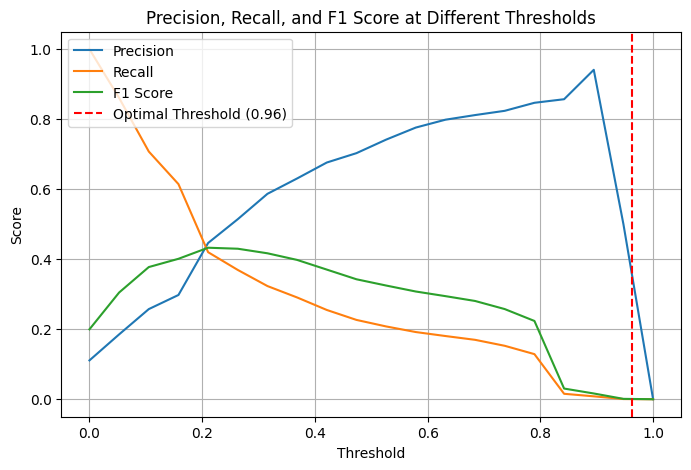

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(thresholds_to_check, precision_scores, label='Precision')
plt.plot(thresholds_to_check, recall_scores, label='Recall')
plt.plot(thresholds_to_check, f1_scores, label='F1 Score')

plt.axvline(best_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({best_threshold:.2f})')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()
